In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# using a pretrained model 

In [ ]:
model = keras.applications.resnet.ResNet50(weights='imagenet')


In [ ]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

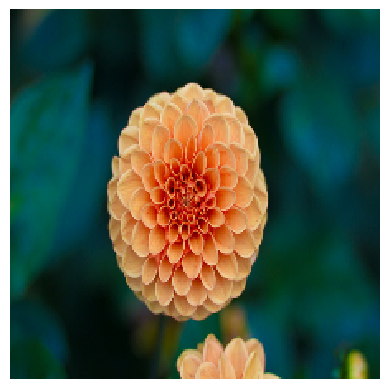

In [ ]:
# reize image shape to shape on input_shape of resnet 50
images_resized = tf.image.resize(images, [224,224])
plot_color_image(images_resized[1])

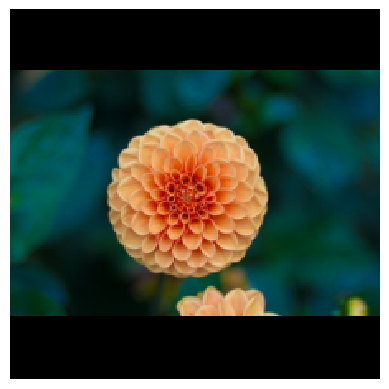

In [ ]:
# Resize with pad
images_resized_pad = tf.image.resize_with_pad(images,224,224,antialias=True)
plot_color_image(images_resized_pad[1])

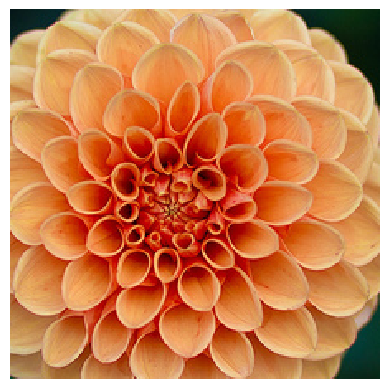

In [ ]:
images_resized_crop_or_pad = tf.image.resize_with_crop_or_pad(images,224,224)
plot_color_image(images_resized_crop_or_pad[1])

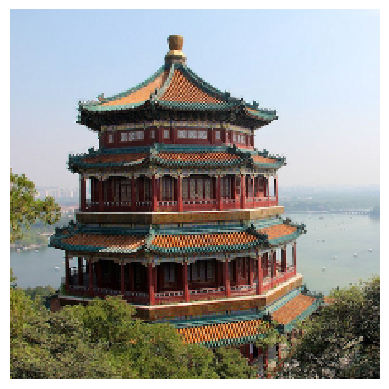

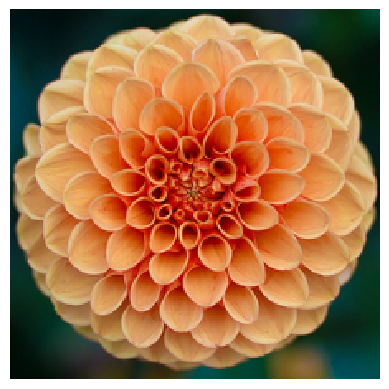

In [ ]:
# reize approrch the size definition

# crop size
cihna_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
image_resized_and_crop = tf.image.crop_and_resize(images, [cihna_box, flower_box], [0,1], [224,224])
plot_color_image(image_resized_and_crop[0])
plt.show()
plot_color_image(image_resized_and_crop[1])
plt.show()

In [ ]:
images.shape

(2, 427, 640, 3)

In [ ]:
images_resized_pad.shape

TensorShape([2, 224, 224, 3])

In [ ]:
images_resized.shape

TensorShape([2, 224, 224, 3])

In [ ]:
images_resized_crop_or_pad.shape


TensorShape([2, 224, 224, 3])

In [ ]:
image_resized_and_crop.shape

TensorShape([2, 224, 224, 3])

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(image_resized_and_crop * 255) #preprocess input
Y_proba = model.predict(inputs)

1/1 [==============================] - 8s 8s/step


In [ ]:
print(Y_proba)
print(Y_proba.shape)
print(np.argmax(Y_proba,axis=1))

[[7.3529711e-09 2.1550377e-08 7.4669257e-09 ... 1.7053464e-09
  1.1168397e-07 3.3814896e-08]
 [2.3453514e-07 7.0248570e-06 4.0475337e-07 ... 5.3985412e-05
  3.6657166e-05 1.3363607e-04]]
(2, 1000)
[698 883]


In [ ]:
top_k = keras.applications.resnet50.decode_predictions(Y_proba,top=3)
for image_index in range(len(images)):
    print(f"Images #{image_index}")
    for class_id, name, Y_proba in top_k[image_index]:
        print(" {} - {:12s} {:.2f}%".format(class_id,name,Y_proba *100))
    print()

Images #0
 n03877845 - palace       43.39%
 n02825657 - bell_cote    43.08%
 n03781244 - monastery    11.69%

Images #1
 n04522168 - vase         53.97%
 n07930864 - cup          9.52%
 n11939491 - daisy        4.96%

